# Домашняя работа к уроку 2
### Листать вниз по коду - задачи ниже

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [5]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [14]:
X_st = standard_scale(X)

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [27]:
#np.random.seed(1234)
W = np.random.randn(X.shape[1])
W

array([0.41888491, 0.82674315, 0.7887853 , 0.35002654])

In [28]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [29]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [-0.52280523  0.11661539  1.38320602 -0.46789514], error 3511.6574790123996
Iter: 500, weights: [-24.42523067 -23.71124828  12.71939975 -24.36359733], error 57.8223903663888
Iter: 1000, weights: [-26.90658053 -26.05974056  10.92741551 -26.82651314], error 52.29597026953083
Iter: 1500, weights: [-27.29602017 -26.29766512  10.68314399 -27.19231107], error 52.190854245941765
Iter: 2000, weights: [-27.40068734 -26.24828797  10.64956054 -27.27262765], error 52.18620091428411
Iter: 2500, weights: [-27.46658528 -26.15980787  10.64465781 -27.31407853], error 52.18340971308121
Iter: 3000, weights: [-27.52720206 -26.06601176  10.64365937 -27.35023515], error 52.18065347432798
Iter: 3500, weights: [-27.58709638 -25.97149902  10.64319244 -27.38566756], error 52.17789833867865
Iter: 4000, weights: [-27.6468888  -25.87689576  10.64279789 -27.42099786], error 52.17514367860717
Iter: 4500, weights: [-27.70666381 -25.78228721  10.64241323 -27.45631074], error 52.17238948240664
Final M

array([-27.76631337, -25.68787416,  10.6420307 , -27.49154713])

In [30]:
# стохастический градиентный спуск
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            inds = np.random.randint(n, size=batch_size)

            X_tmp = X[inds, ]
            y_tmp = np.array(y)[inds]

            
            y_pred_tmp = np.dot(X_tmp, W)
            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
            
            err = calc_mse(y, np.dot(X, W))
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [31]:
stohastic_gradient_descent(X_st, y, iterations=5000, batch_size=4, eta=1e-2)

amount of batches is 3
Iter: 0, weights: [-2.67061046 -0.18320855  6.1564437  -1.87691393], error 2084.433600723753
Iter: 500, weights: [-28.18357866 -25.33919006  10.58667559 -27.34585407], error 52.17637583347956
Iter: 1000, weights: [-28.33259746 -25.01313205  10.67369113 -27.41973164], error 52.15343547645
Iter: 1500, weights: [-28.48071952 -24.66888383  10.86481228 -27.49125722], error 52.22773149606792
Iter: 2000, weights: [-28.62587098 -24.34513681  10.65684986 -27.56086716], error 52.166396620734574
Iter: 2500, weights: [-28.94763516 -24.21295301  10.72606573 -27.80932818], error 52.15422873672323
Iter: 3000, weights: [-28.974076   -23.76443392  11.03068226 -27.7609199 ], error 52.4083967667033
Iter: 3500, weights: [-29.48315415 -23.79571273  11.10373806 -28.19548565], error 53.25963650562295
Iter: 4000, weights: [-29.57121992 -23.41828879  10.93679015 -28.2083376 ], error 52.5256020214837
Iter: 4500, weights: [-29.60181328 -22.98940493  10.34541742 -28.16508138], error 52.4541

array([-29.93172303, -22.8863446 ,  10.0036369 , -28.42513537])

In [32]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        #if i % (iterations / 10) == 0:
            #print(f'Iter: {i}, weights: {W}, error {err}')
    
    #print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

### Задача 1
Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [83]:
w_list = []
lamb = 1e-8
lamb_list = []
while lamb<100:
    w_list.append(gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=lamb))
    lamb_list.append(lamb)
    lamb*=2
    
w_list

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\User\AppData\Local\Temp\ipykernel_11920\1493808047.py:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
C:\Users\User\AppData\Local\Temp\ipykernel_11920\244607881.py:12: RuntimeWarning: overflow encountered in add
  W -= eta * (dQ + dReg)
C:\Users\User\AppData\Local\Temp\ipykernel_11920\244607881.py:12: RuntimeWarning: invalid value encountered in subtract
  W -= eta * (dQ + dReg)
C:\Users\User\AppData\Local\Temp\ipykernel_11920\244607881.py:10: RuntimeWarning: overflow encountered in multiply
  dReg = reg * W # градиент регуляризации


[array([-31.76176765, -18.53435341,  10.61381514, -30.68463081]),
 array([-32.08153401, -18.27300168,  10.61253539, -30.62774162]),
 array([-34.21237687, -16.86472954,  10.60505351, -29.91397706]),
 array([-32.73556042, -18.59008853,  10.61259623, -29.65625088]),
 array([-33.20887294, -16.84327853,  10.60642943, -30.93757113]),
 array([-34.30686266, -16.94738131,  10.60518758, -29.73659102]),
 array([-33.69937472, -17.76917371,  10.60865312, -29.51800146]),
 array([-33.48627681, -16.97788137,  10.60649377, -30.52523077]),
 array([-33.62810716, -16.37611611,  10.60444348, -30.9876323 ]),
 array([-32.40114031, -17.32625536,  10.60927902, -31.25841179]),
 array([-32.88885099, -17.40197979,  10.60899623, -30.6945516 ]),
 array([-31.7430139 , -18.04799931,  10.61302739, -31.18846912]),
 array([-32.65026463, -19.51465609,  10.61705084, -28.80660389]),
 array([-32.50705662, -16.9618681 ,  10.61066051, -31.50638619]),
 array([-32.3756585 , -17.62740859,  10.61579707, -30.95638263]),
 array([-3

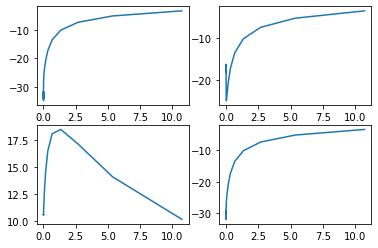

In [82]:
fig, ax = plt.subplots(2,2)


w_show = []
for i in w_list:
    w_show.append(i[0])
ax[0,0].plot(lamb_list, w_show)
plt.grid()

w_show = []
for i in w_list:
    w_show.append(i[1])
ax[0,1].plot(lamb_list, w_show)
plt.grid()

w_show = []
for i in w_list:
    w_show.append(i[2])
ax[1,0].plot(lamb_list, w_show)
plt.grid()

w_show = []
for i in w_list:
    w_show.append(i[3])
ax[1,1].plot(lamb_list, w_show)
plt.grid()

plt.show()

#### Вывод:
При увеличении lambda веса (по модулю) стремятся к 0

### Задача 2
Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [77]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1]) # начальные веса
    n = X.shape[0] 
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg # градиент регуляризации - производная d(lambda*w)/dw = lambda
        
        W -= eta * (dQ + dReg)
        
    return W

In [76]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-3)

array([-32.46539576, -17.30738023,  10.60696208, -31.22194469])

### Задача 3
*Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [61]:
X0 = X[:,2]
print('У исходного признака:')
print(f'min={X0.min()}, max={X0.max()}')
print(f'среднее={X0.mean()}, станд.отклонение={X0.std()}')

У исходного признака:
min=450, max=2000
среднее=975.0, станд.отклонение=484.8968962573384


In [62]:
X0_norm = min_max_scale(X0)
print('После применения к признаку только нормализации:')
print(f'min={X0_norm.min()}, max={X0_norm.max()}')
print(f'среднее={X0_norm.mean()}, станд.отклонение={X0_norm.std()}')

После применения к признаку только нормализации:
min=0.0, max=1.0
среднее=0.33870967741935487, станд.отклонение=0.312836707262799


In [63]:
X0_stand = standard_scale(X0)
print('После применения к признаку только стандартизации:')
print(f'min={X0_stand.min()}, max={X0_stand.max()}')
print(f'среднее={X0_stand.mean()}, станд.отклонение={X0_stand.std()}')

После применения к признаку только стандартизации:
min=-1.0827043935570553, max=2.1138514350399653
среднее=-4.163336342344337e-17, станд.отклонение=0.9999999999999999


In [64]:
X0_norm_stand = standard_scale(min_max_scale(X0))
print('После применения к признаку сначала нормализации, а затем стандартизации:')
print(f'min={X0_norm_stand.min()}, max={X0_norm_stand.max()}')
print(f'среднее={X0_norm_stand.mean()}, станд.отклонение={X0_norm_stand.std()}')

После применения к признаку сначала нормализации, а затем стандартизации:
min=-1.0827043935570555, max=2.1138514350399653
среднее=-1.1310397063368783e-16, станд.отклонение=0.9999999999999999


In [65]:
X0_stand_norm = min_max_scale(standard_scale(X0))
print('После применения к признаку сначала стандартизации, а затем нормализации:')
print(f'min={X0_stand_norm.min()}, max={X0_stand_norm.max()}')
print(f'среднее={X0_stand_norm.mean()}, станд.отклонение={X0_stand_norm.std()}')

После применения к признаку сначала стандартизации, а затем нормализации:
min=0.0, max=1.0
среднее=0.3387096774193548, станд.отклонение=0.312836707262799


#### Вывод:
Таким образом применится тот вид масштабирования, который был применен к признаку крайним